<a href="https://colab.research.google.com/github/IamRishavDas/Tora-Project-Final-Year---/blob/main/Project_Tora_16011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("alisha khatun")

alisha khatun


In [ ]:
from google.colab import files
uploaded = files.upload()

**For data dowloading**

In [ ]:
library(GEOquery)
geo_data <- getGEO("GSE16011", GSEMatrix = TRUE)
head(geo_data)
?geo_data
geo_data <- geo_data[[1]]
head(geo_data)
str(geo_data)
expression_data <- exprs(geo_data)
sample_data <- pData(geo_data)
feature_data <- fData(geo_data)
write.csv(expression_data, "C:/Users/Desktop/Project/Datasets/GSE16011_expression_data.csv", row.names = TRUE)

**For normalise data**

In [ ]:
data_16011 <- GSE16011_expression_data
print(nrow(data_16011))
print(ncol(data_16011))
#normalization function
min_max_normalize <- function(x){
  return ((x-min(x))/(max(x) - min(x)))
}
normalized_dataset_16011 <- as.data.frame(lapply(data_16011[, 2:285], function(x) {
  if(is.numeric(x)) {
    return(min_max_normalize(x))
  } else {
    return(x)
  }
}))
write.csv(normalized_dataset_16011, "C:/Users/Desktop/Project/Datasets/Normalized_GSE16011_expression_data.csv", row.names = FALSE)
n_data <- Normalized_GSE16011_expression_data
first_col <- data_16011[, 1]
df2 <- cbind(first_col, n_data)
colnames(df2)[1] <- "id"
head(df2)
write.csv(df2, "C:/Users/Desktop/Project/Datasets/Normalized_GSE16011_expression_data_with_ID.csv", row.names = FALSE)

**For data dowloading**

In [ ]:
library(GEOquery)

geo_data <- getGEO("GSE108474", GSEMatrix = TRUE)
head(geo_data)
?geo_data

geo_data <- geo_data[[1]]


head(geo_data)
str(geo_data)

expression_data <- exprs(geo_data)
sample_data <- pData(geo_data)
feature_data <- fData(geo_data)


write.csv(expression_data, "C:/Users/Desktop/Project/Datasets/GSE108474_expression_data.csv", row.names = TRUE)



**For normalise data**

In [ ]:
gse_108474 <- GSE108474_expression_data
print(nrow(gse_108474))
print(ncol(gse_108474))


#normalization function
min_max_normalize <- function(x){
  return ((x-min(x))/(max(x) - min(x)))
}

normalized_dataset_108474 <- as.data.frame(lapply(gse_108474[, 2:542], function(x) {
  if(is.numeric(x)) {
    return(min_max_normalize(x))
  } else {
    return(x)
  }
}))

write.csv(normalized_dataset_108474, "C:/Users/Desktop/Project/Datasets/Normalized_GSE108474_expression_data.csv", row.names = FALSE)

n_data_108474 <- Normalized_GSE108474_expression_data

ncol(n_data_108474)


first_col <- gse_108474[, 1]

df2 <- cbind(first_col, n_data_108474)
colnames(df2)[1] <- "id"
head(df2)

write.csv(df2, "C:/Users/Desktop/Project/Datasets/Normalized_GSE108474_expression_data_with_ID.csv", row.names = FALSE)


# **From this portion work will be done on the Normalize Datasets**

Step-1: Uploading the Normalize 16011 File here by running the following cell..

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Normalized_GSE16011_expression_data_with_ID.csv to Normalized_GSE16011_expression_data_with_ID.csv


Step-2: Loading Necessary Python libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

Loading the Normalized 16011 data into the "data_16011" variable using pandas library in python



In [5]:
data_16011 = pd.read_csv("Normalized_GSE16011_expression_data_with_ID.csv")

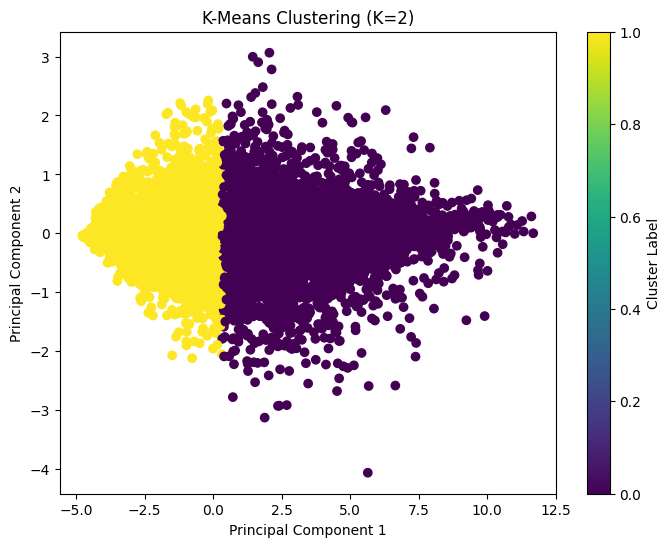

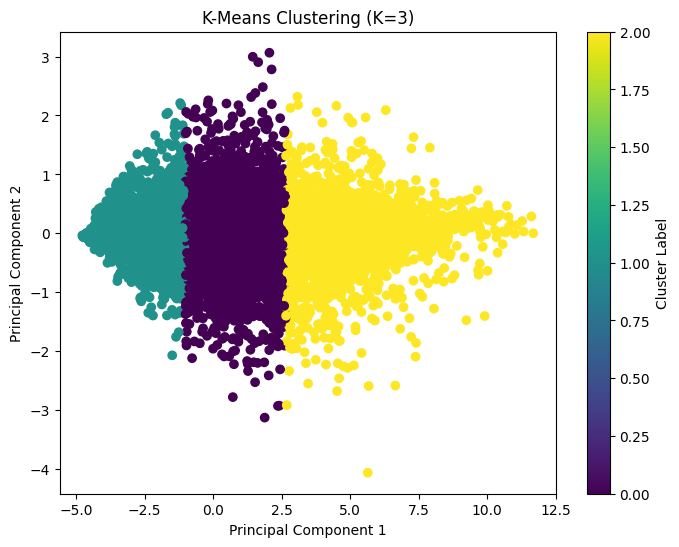

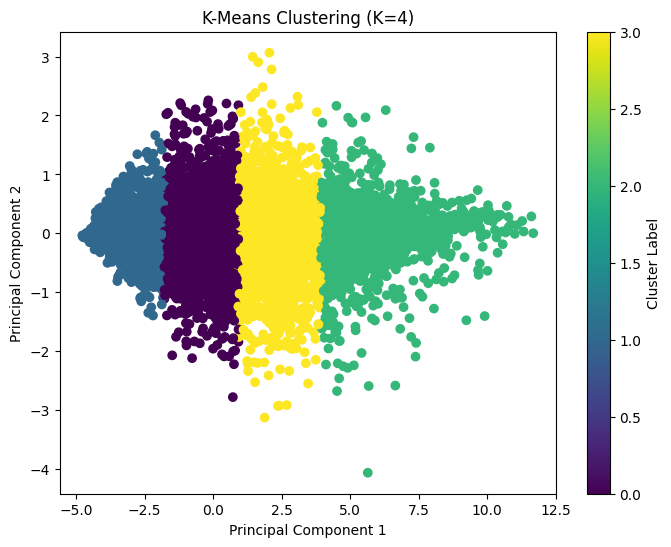

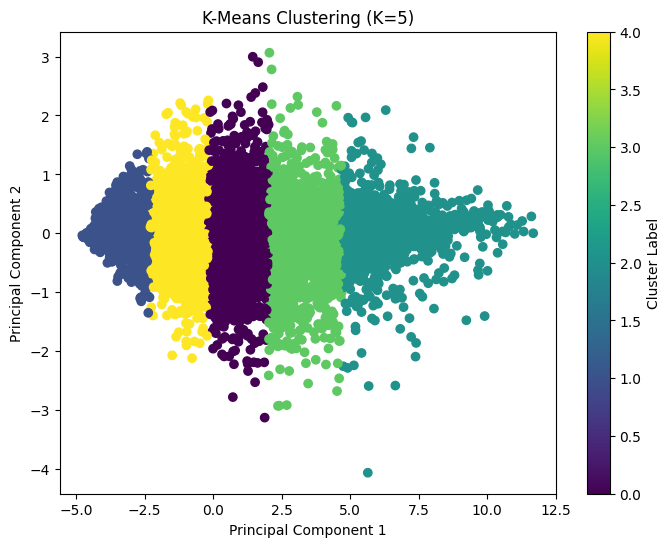

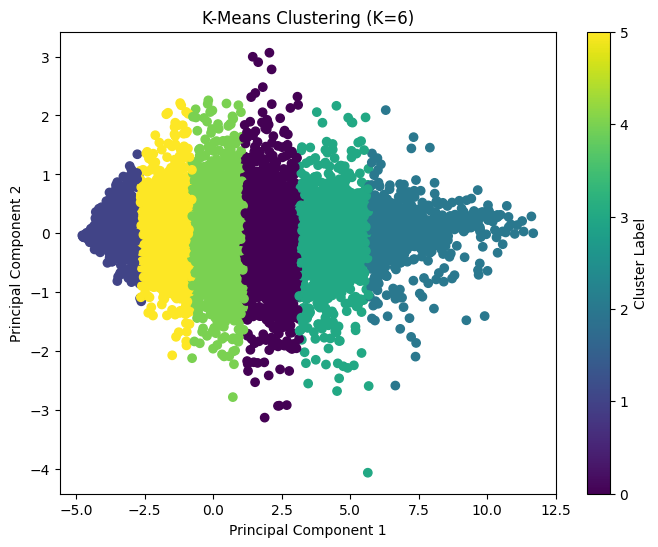

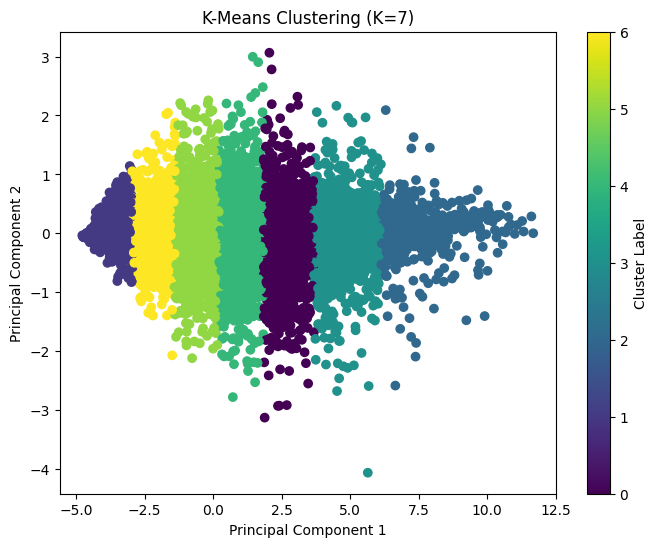

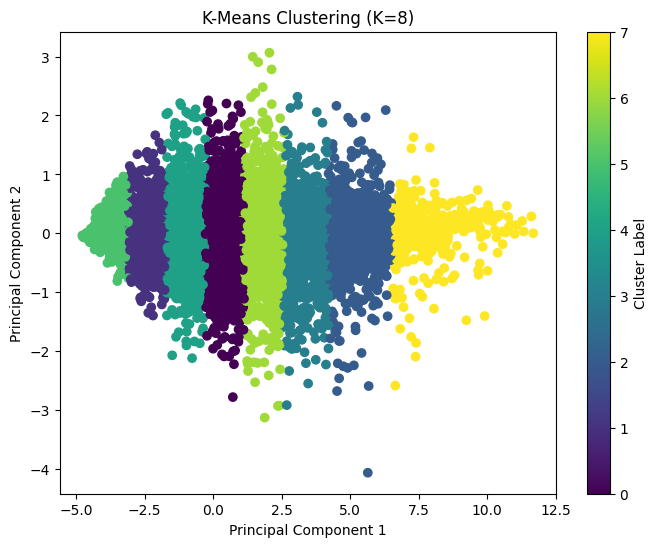

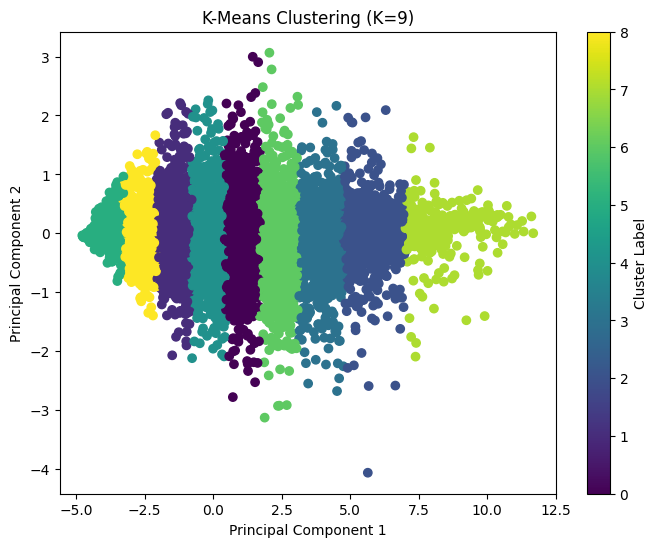

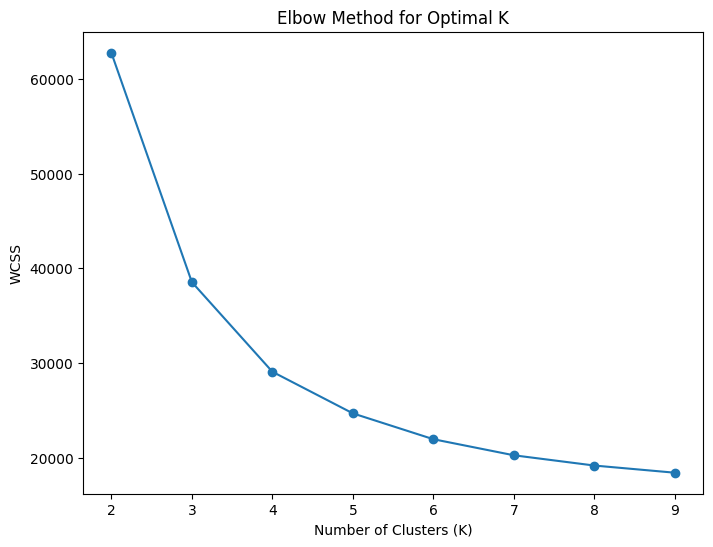


Evaluation metrics for K=2:
Silhouette Score: 0.5227932169794106
Calinski-Harabasz Score: 30528.340520242145
Dunn Index: 0.04223727483009924

Evaluation metrics for K=3:
Silhouette Score: 0.452618981575149
Calinski-Harabasz Score: 30343.026378175815
Dunn Index: 0.04661859683394705

Evaluation metrics for K=4:
Silhouette Score: 0.4000492881319448
Calinski-Harabasz Score: 28699.038786485886
Dunn Index: 0.03578493787124406

Evaluation metrics for K=5:
Silhouette Score: 0.3473556781887016
Calinski-Harabasz Score: 26127.675951695117
Dunn Index: 0.04253107713846353

Evaluation metrics for K=6:
Silhouette Score: 0.31442233749883247
Calinski-Harabasz Score: 23928.305859008193
Dunn Index: 0.04872991865868739

Evaluation metrics for K=7:
Silhouette Score: 0.2774794282133406
Calinski-Harabasz Score: 21849.662560545486
Dunn Index: 0.03512521906728284

Evaluation metrics for K=8:
Silhouette Score: 0.2491501244375451
Calinski-Harabasz Score: 19924.026016039817
Dunn Index: 0.045727924865397375

Eval

In [14]:
data = data_16011.iloc[:, 1:]


# Perform PCA (2 components)
pca = PCA(n_components=data.shape[1])
data_pca = pca.fit_transform(data)

# Function to calculate the Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    # Reduce memory usage by subsampling
    sample_size = int(len(X) * sample_fraction)
    # Randomly sample data
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]  # Subset of data
    labels_sample = labels[sample_indices]  # Corresponding labels for the sampled data

    n_clusters = len(np.unique(labels_sample))

    # Calculate the pairwise distances between each point in the sample
    pairwise_distances = cdist(X_sample, X_sample)

    # Initialize the minimum inter-cluster distance and maximum intra-cluster distance
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(n_clusters):
        # Get the points belonging to the current cluster
        cluster_points = X_sample[labels_sample == i]

        # Calculate the diameter of the current cluster (maximum intra-cluster distance)
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in range(i + 1, n_clusters):
            # Get the points belonging to the other cluster
            other_cluster_points = X_sample[labels_sample == j]

            # Calculate the distance between the two clusters (minimum inter-cluster distance)
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Dunn Index: min inter-cluster distance / max intra-cluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist

# Step 4: K-Means Clustering for different values of K (2, 3, 4)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
dunn_scores = []  # To store Dunn Index for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k

# Iterate over the values of K (2 to 4)
for k in range(2, 10):  # Only for k = 2, 3, 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

    # Dunn Index (with downsampling to avoid memory crash)
    dunn_idx = dunn_index(data_pca, cluster_labels, sample_fraction=0.1)  # 10% sample
    dunn_scores.append(dunn_idx)

    # Plot the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', label=f'K={k}')
    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
optimal_k = 3  # Change this after observing the elbow plot

# Step 7: Print the clustering evaluation metrics for the values K = 2, 3, and 4
for k in range(2, 10):  # For K=2, K=3, and K=4
    print(f"\nEvaluation metrics for K={k}:")
    print(f"Silhouette Score: {sil_scores[k - 2]}")
    print(f"Calinski-Harabasz Score: {calinski_scores[k - 2]}")
    print(f"Dunn Index: {dunn_scores[k - 2]}")


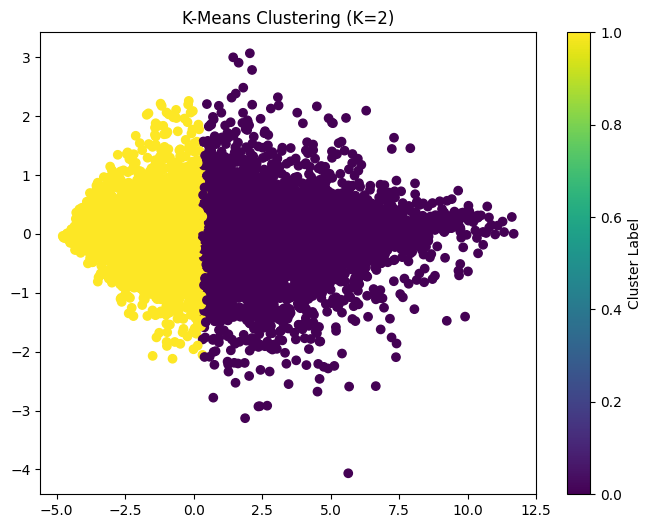

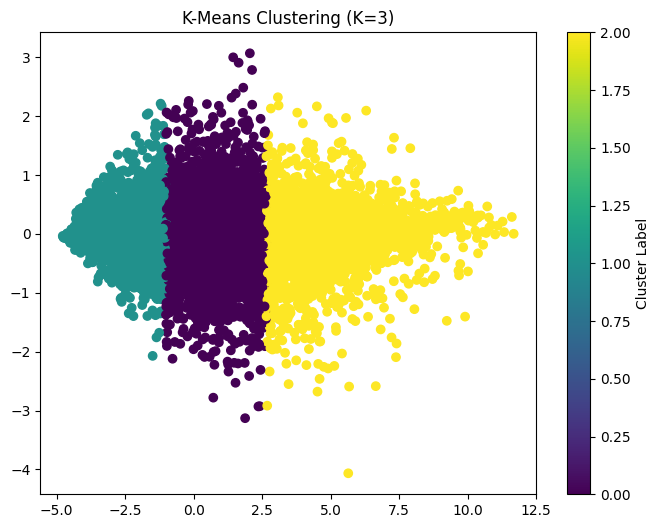

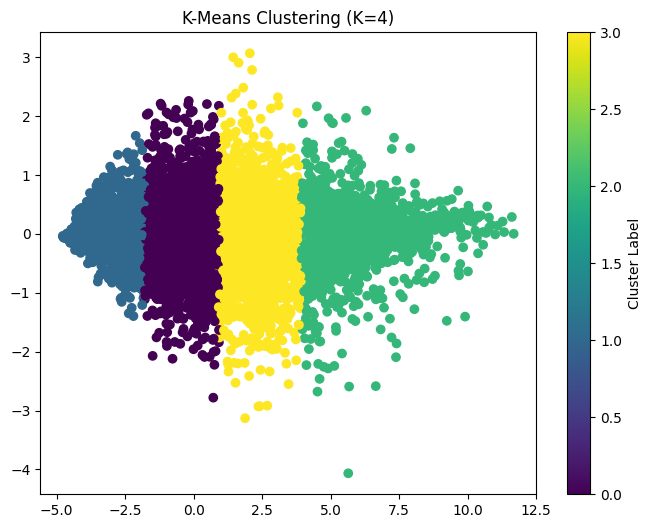

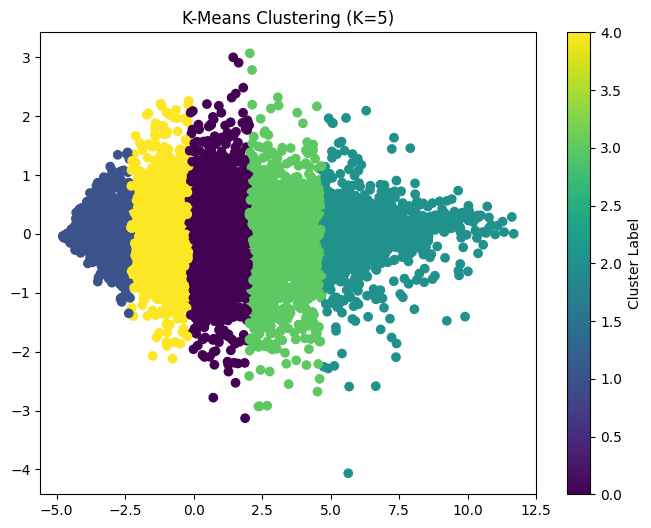

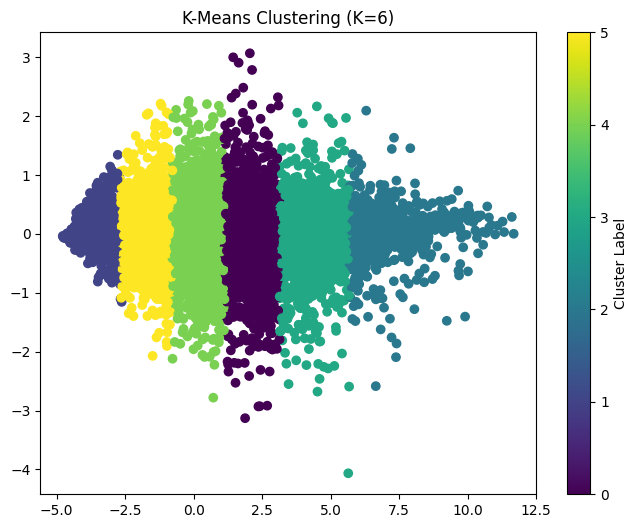

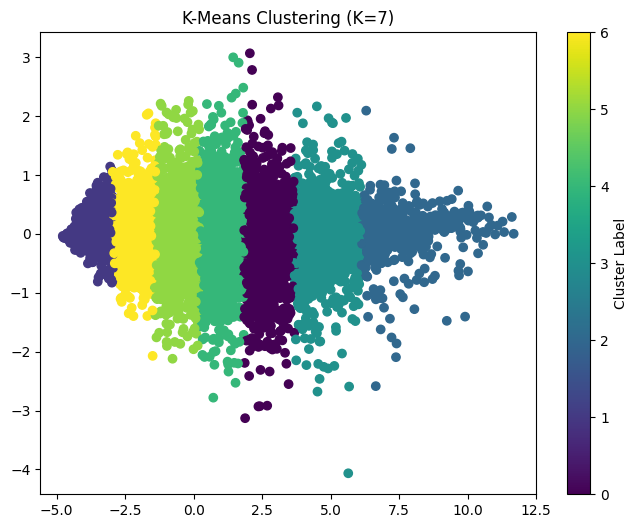

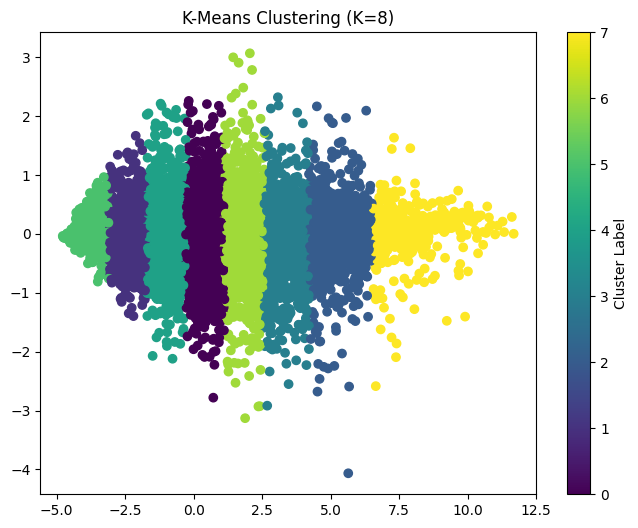

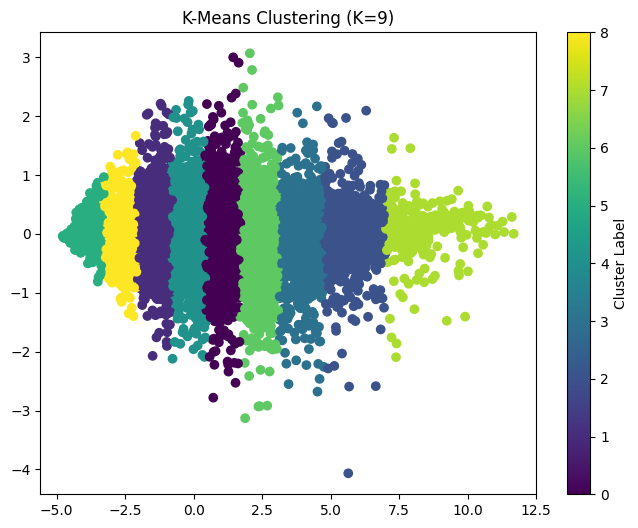

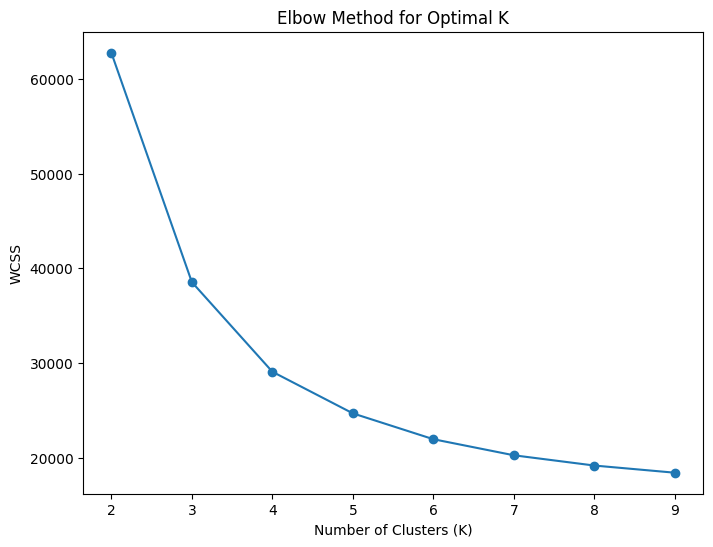


Evaluation metrics for K=2:
Silhouette Score: 0.5227932169794106
Calinski-Harabasz Score: 30528.340520242145
Dunn Index: 0.044474447136255674

Evaluation metrics for K=3:
Silhouette Score: 0.452618981575149
Calinski-Harabasz Score: 30343.026378175815
Dunn Index: 0.04502281985419226

Evaluation metrics for K=4:
Silhouette Score: 0.4000492881319448
Calinski-Harabasz Score: 28699.038786485886
Dunn Index: 0.048741354500758866

Evaluation metrics for K=5:
Silhouette Score: 0.3473556781887016
Calinski-Harabasz Score: 26127.675951695117
Dunn Index: 0.03175151406866768

Evaluation metrics for K=6:
Silhouette Score: 0.31442233749883247
Calinski-Harabasz Score: 23928.305859008193
Dunn Index: 0.04661586669555145

Evaluation metrics for K=7:
Silhouette Score: 0.2774794282133406
Calinski-Harabasz Score: 21849.662560545486
Dunn Index: 0.047712887835049296

Evaluation metrics for K=8:
Silhouette Score: 0.2491501244375451
Calinski-Harabasz Score: 19924.026016039817
Dunn Index: 0.035630761902370814

E

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Perform PCA (2 components)
pca = PCA(n_components=data.shape[1])
data_pca = pca.fit_transform(data)

# Save PCA results to a CSV file
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
pca_df.to_csv('pca_results.csv', index=False)  # Save PCA results as CSV

# Function to calculate the Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    # Reduce memory usage by subsampling
    sample_size = int(len(X) * sample_fraction)
    # Randomly sample data
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]  # Subset of data
    labels_sample = labels[sample_indices]  # Corresponding labels for the sampled data

    n_clusters = len(np.unique(labels_sample))

    # Calculate the pairwise distances between each point in the sample
    pairwise_distances = cdist(X_sample, X_sample)

    # Initialize the minimum inter-cluster distance and maximum intra-cluster distance
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(n_clusters):
        # Get the points belonging to the current cluster
        cluster_points = X_sample[labels_sample == i]

        # Calculate the diameter of the current cluster (maximum intra-cluster distance)
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in range(i + 1, n_clusters):
            # Get the points belonging to the other cluster
            other_cluster_points = X_sample[labels_sample == j]

            # Calculate the distance between the two clusters (minimum inter-cluster distance)
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Dunn Index: min inter-cluster distance / max intra-cluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist

# Step 4: K-Means Clustering for different values of K (2, 3, 4)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
dunn_scores = []  # To store Dunn Index for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k

# Iterate over the values of K (2 to 9)
for k in range(2, 10):  # For k = 2 to k = 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

    # Dunn Index (with downsampling to avoid memory crash)
    dunn_idx = dunn_index(data_pca, cluster_labels, sample_fraction=0.1)  # 10% sample
    dunn_scores.append(dunn_idx)

    # Save individual clustering results to CSV (with the first column removed)
    clustered_data = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
    clustered_data['Cluster'] = cluster_labels

    # Drop the first column of the PCA result and save the remaining columns with cluster labels
    clustered_data_without_first_column = clustered_data.iloc[:, 1:]

    # Save the results for the current value of K to a CSV file
    clustered_data_without_first_column.to_csv(f'clustered_results_k{k}.csv', index=False)

    # Plot the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', label=f'K={k}')
    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('')
    plt.ylabel('')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
optimal_k = 3  # Change this after observing the elbow plot

# Step 7: Print the clustering evaluation metrics for the values K = 2, 3, and 4
for k in range(2, 10):  # For K=2 to K=9
    print(f"\nEvaluation metrics for K={k}:")
    print(f"Silhouette Score: {sil_scores[k - 2]}")
    print(f"Calinski-Harabasz Score: {calinski_scores[k - 2]}")
    print(f"Dunn Index: {dunn_scores[k - 2]}")


To view the uploaded generated files while doing the K - Means Clustering with different values of K in CSV(Comma Speerated Value - kind of Excel file but better for storing numeric results) file

In [16]:
import os

# List the files in the current directory
uploaded_files = os.listdir()

# Display the list of uploaded files
print(uploaded_files)

['.config', 'clustered_results_k7.csv', 'clustered_results_k2.csv', 'clustered_results_k5.csv', 'clustered_results_k8.csv', 'clustered_results_k3.csv', 'clustered_results_k9.csv', 'Normalized_GSE16011_expression_data_with_ID.csv', 'clustered_results_k6.csv', 'clustered_results_k4.csv', 'pca_results.csv', 'sample_data']


For downloading the K-Menas Results

In [17]:
from google.colab import files

# Replace 'divisive_clustering_result.csv' with your file name
kmeans_clustering_k2 = 'clustered_results_k2.csv'
kmeans_clustering_k3 = 'clustered_results_k3.csv'
kmeans_clustering_k4 = 'clustered_results_k4.csv'
kmeans_clustering_k5 = 'clustered_results_k5.csv'
kmeans_clustering_k6 = 'clustered_results_k6.csv'
kmeans_clustering_k7 = 'clustered_results_k7.csv'
kmeans_clustering_k8 = 'clustered_results_k8.csv'
kmeans_clustering_k9 = 'clustered_results_k9.csv'


# Download the file
files.download(kmeans_clustering_k2)
files.download(kmeans_clustering_k3)
files.download(kmeans_clustering_k4)
files.download(kmeans_clustering_k5)
files.download(kmeans_clustering_k6)
files.download(kmeans_clustering_k7)
files.download(kmeans_clustering_k8)
files.download(kmeans_clustering_k9)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>